In [3]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
import sunpy.map
import synthesizAR

%matplotlib inline

## Force Free

Try comparing potential and force-free field results. The results form Ruochun are based on the magnetogram of NOAA 1109. Need to go back and find this magnetogram, do a potential extrapolation, then load his field and compare the two, making sure to get the bounds correct.

In [98]:
bx = np.loadtxt('/Users/willbarnes/Desktop/rz_ff_field/hmi.bx',comments='//').reshape((96,96,96))
by = np.loadtxt('/Users/willbarnes/Desktop/rz_ff_field/hmi.by',comments='//').reshape((96,96,96))
bz = np.loadtxt('/Users/willbarnes/Desktop/rz_ff_field/hmi.bz',comments='//').reshape((96,96,96))

In [107]:
shape = (96,96,96)
#######
## bx
test_bx = np.zeros(shape)
with open('/Users/willbarnes/Desktop/rz_ff_field/hmi.bx','r') as f:
    lines = f.readlines()
z_counter = 0
x_counter = 0
for i,l in enumerate(lines):
    if i == 0:
        continue
    if '/' in l:
        x_counter = 0
        z_counter += 1
        continue
    test_bx[x_counter,:,z_counter] = np.array(l.split(),dtype=np.float64)
    x_counter += 1

########
## by
test_by = np.zeros(shape)
with open('/Users/willbarnes/Desktop/rz_ff_field/hmi.by','r') as f:
    lines = f.readlines()
z_counter = 0
x_counter = 0
for i,l in enumerate(lines):
    if i == 0:
        continue
    if '/' in l:
        x_counter = 0
        z_counter += 1
        continue
    test_by[x_counter,:,z_counter] = np.array(l.split(),dtype=np.float64)
    x_counter += 1

########
## bx
test_bz = np.zeros(shape)
with open('/Users/willbarnes/Desktop/rz_ff_field/hmi.bz','r') as f:
    lines = f.readlines()
z_counter = 0
x_counter = 0
for i,l in enumerate(lines):
    if i == 0:
        continue
    if '/' in l:
        x_counter = 0
        z_counter += 1
        continue
    test_bz[x_counter,:,z_counter] = np.array(l.split(),dtype=np.float64)
    x_counter += 1


In [129]:
data = dict(
            Bx=(np.transpose(test_bx,axes=[1,0,2]), 'T'),
            By=(np.transpose(test_by,axes=[1,0,2]), 'T'),
            Bz=(np.transpose(test_bz,axes=[1,0,2]), 'T'))
bbox = np.array([[-50,50],[-50,50],[0,100]])
# assemble the dataset
extrap_field = yt.load_uniform_grid(data, data['Bx'][0].shape, bbox=bbox, length_unit=yt.units.cm,
                            geometry=('cartesian', ('x', 'y', 'z')))

yt : [INFO     ] 2017-11-21 16:15:37,777 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-11-21 16:15:37,779 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-11-21 16:15:37,781 Parameters: domain_left_edge          = [-50. -50.   0.]
yt : [INFO     ] 2017-11-21 16:15:37,782 Parameters: domain_right_edge         = [  50.   50.  100.]
yt : [INFO     ] 2017-11-21 16:15:37,784 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2017-11-21 16:16:45,397 Projection completed
yt : [INFO     ] 2017-11-21 16:16:45,399 xlim = -50.000000 50.000000
yt : [INFO     ] 2017-11-21 16:16:45,400 ylim = -50.000000 50.000000
yt : [INFO     ] 2017-11-21 16:16:45,402 xlim = -50.000000 50.000000
yt : [INFO     ] 2017-11-21 16:16:45,404 ylim = -50.000000 50.000000
yt : [INFO     ] 2017-11-21 16:16:45,406 Making a fixed resolution buffer of (('stream', 'Bz')) 800 by 800
yt : [WARNING  ] 2017-11-21 16:16:45,432 Plot image for field ('stream', 'Bz') has both positive and negative values. Min = -1.480636, Max = 0.629870.
yt : [WARNING  ] 2017-11-21 16:16:45,433 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2017-11-21 16:16:45,744 Projection completed
yt : [INFO     ] 2017-11-21 16:16:45,816 Projection completed



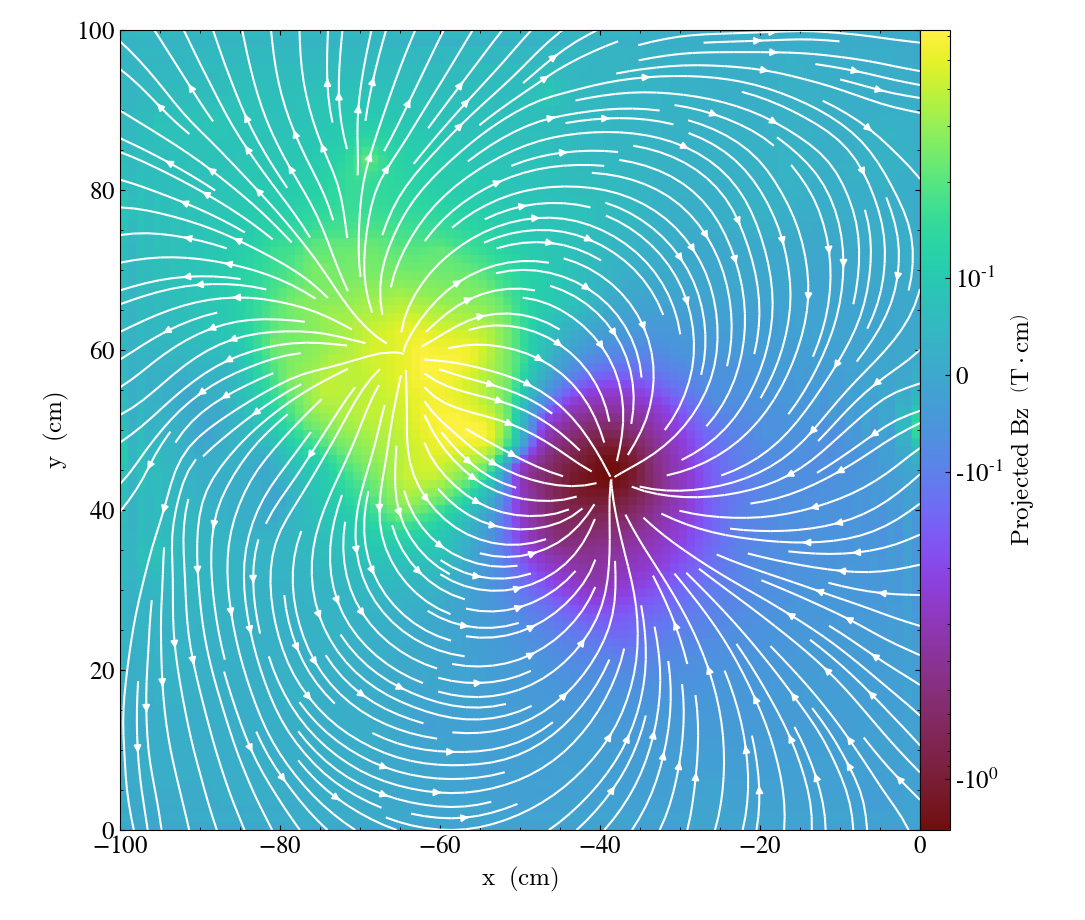

In [134]:
center=(extrap_field.domain_center
        +np.array([0,0,-0.49])*extrap_field.domain_width)
p = yt.ProjectionPlot(extrap_field,'z','Bz',
                 origin='lower-right-domain',
                 axes_unit='cm',
                 center=center,
                 #width=((1*extrap_field.domain_width.value[1],'cm'),
                 #       (1*extrap_field.domain_width.value[2],'cm'))
                )
p.annotate_streamlines('Bx','By',density=2,plot_args={'color':'w'})
#p.set_zlim('Bz',-3e-2,3e-2)
#p.set_log('Bz',True,linthresh=1e-3)
p.show()

## Potential Field

In [83]:
bx = np.loadtxt('/Users/willbarnes/Downloads/hmi_noaa1158.potential_field.bx',comments='//').reshape((100,99,100))
by = np.loadtxt('/Users/willbarnes/Downloads/hmi_noaa1158.potential_field.by',comments='//').reshape((100,99,100))
bz = np.loadtxt('/Users/willbarnes/Downloads/hmi_noaa1158.potential_field.bz',comments='//').reshape((100,99,100))

In [68]:
#######
## bx
test_bx = np.zeros((100,99,100))
with open('/Users/willbarnes/Downloads/hmi_noaa1158.potential_field.bx','r') as f:
    lines = f.readlines()
z_counter = 0
x_counter = 0
for i,l in enumerate(lines):
    if i == 0:
        continue
    if '/' in l:
        x_counter = 0
        z_counter += 1
        continue
    test_bx[x_counter,:,z_counter] = np.array(l.split(),dtype=np.float64)
    x_counter += 1

########
## by
test_by = np.zeros((100,99,100))
with open('/Users/willbarnes/Downloads/hmi_noaa1158.potential_field.by','r') as f:
    lines = f.readlines()
z_counter = 0
x_counter = 0
for i,l in enumerate(lines):
    if i == 0:
        continue
    if '/' in l:
        x_counter = 0
        z_counter += 1
        continue
    test_by[x_counter,:,z_counter] = np.array(l.split(),dtype=np.float64)
    x_counter += 1

########
## bx
test_bz = np.zeros((100,99,100))
with open('/Users/willbarnes/Downloads/hmi_noaa1158.potential_field.bz','r') as f:
    lines = f.readlines()
z_counter = 0
x_counter = 0
for i,l in enumerate(lines):
    if i == 0:
        continue
    if '/' in l:
        x_counter = 0
        z_counter += 1
        continue
    test_bz[x_counter,:,z_counter] = np.array(l.split(),dtype=np.float64)
    x_counter += 1


In [95]:
data = dict(
            Bx=(np.transpose(bx,axes=[1,2,0]), 'T'),
            By=(np.transpose(by,axes=[1,2,0]), 'T'),
            Bz=(np.transpose(bz,axes=[1,2,0]), 'T'))
bbox = np.array([[-50,50],[-50,50],[0,100]])
# assemble the dataset
extrap_field = yt.load_uniform_grid(data, data['Bx'][0].shape, bbox=bbox, length_unit=yt.units.cm,
                            geometry=('cartesian', ('x', 'y', 'z')))

yt : [INFO     ] 2017-11-21 15:29:49,113 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-11-21 15:29:49,115 Parameters: domain_dimensions         = [ 99 100 100]
yt : [INFO     ] 2017-11-21 15:29:49,116 Parameters: domain_left_edge          = [-50. -50.   0.]
yt : [INFO     ] 2017-11-21 15:29:49,118 Parameters: domain_right_edge         = [  50.   50.  100.]
yt : [INFO     ] 2017-11-21 15:29:49,120 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2017-11-21 15:31:18,138 xlim = -50.000000 50.000000
yt : [INFO     ] 2017-11-21 15:31:18,140 ylim = 0.000000 100.000000
yt : [INFO     ] 2017-11-21 15:31:18,141 xlim = -50.000000 50.000000
yt : [INFO     ] 2017-11-21 15:31:18,143 ylim = 0.000000 100.000000
yt : [INFO     ] 2017-11-21 15:31:18,146 Making a fixed resolution buffer of (('stream', 'Bx')) 800 by 800
yt : [WARNING  ] 2017-11-21 15:31:18,181 Plot image for field ('stream', 'Bx') has both positive and negative values. Min = -0.017226, Max = 0.016582.
yt : [WARNING  ] 2017-11-21 15:31:18,182 Switching to symlog colorbar scaling unless linear scaling is specified later



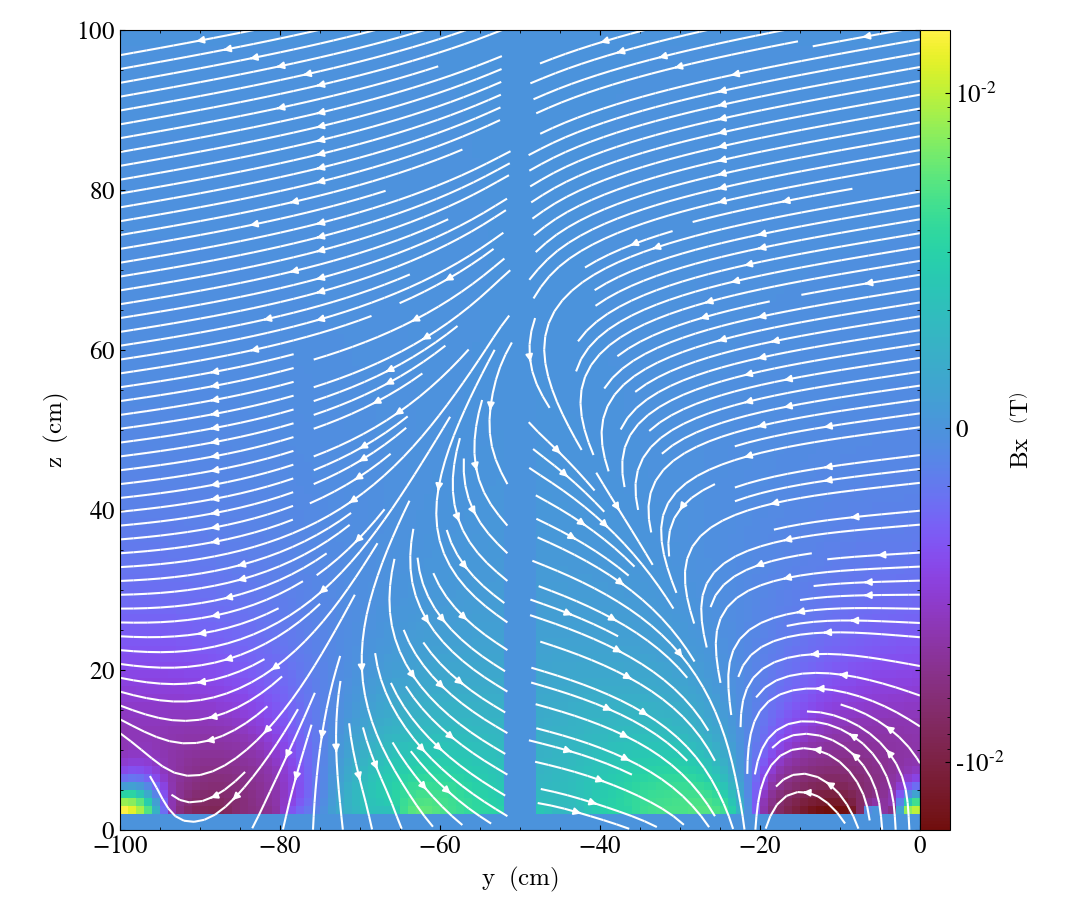

In [97]:
center=(extrap_field.domain_center
        +np.array([0,0,0])*extrap_field.domain_width)
p = yt.SlicePlot(extrap_field,'x','Bx',
                 origin='lower-right-domain',
                 axes_unit='cm',
                 center=center,
                 width=((1*extrap_field.domain_width.value[1],'cm'),
                        (1*extrap_field.domain_width.value[2],'cm'))
                )
p.annotate_streamlines('Bx','By',density=2,plot_args={'color':'w'})
#p.set_zlim('Bz',-3e-2,3e-2)
#p.set_log('Bz',True,linthresh=1e-3)
p.show()